In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from series_analysis import SeriesAnalysis

In [2]:
df = pd.read_csv("./ZIKABR17.csv")
df['DT_NOTIFIC']

0        2017-04-01
1        2017-04-01
2        2017-04-01
3        2017-04-01
4        2017-04-01
            ...    
32679    2017-03-31
32680    2017-03-31
32681    2017-03-31
32682    2017-03-31
32683    2017-03-31
Name: DT_NOTIFIC, Length: 32684, dtype: object

In [3]:
df = df.groupby('DT_NOTIFIC').count().reset_index()
df.rename(columns={'DT_NOTIFIC':"Data", 'TP_NOT':'Casos'}, inplace= True)
df = df[['Data','Casos']]
df['Data'] = pd.to_datetime(df['Data'])

In [4]:
df.head()

,Data,Casos
0,2017-01-01,17
1,2017-01-02,98
2,2017-01-03,136
3,2017-01-04,130
4,2017-01-05,112


In [5]:
series_analysis = SeriesAnalysis()

## Plotando Série

<Axes: title={'center': 'Casos de Zika no ano de 2017'}, xlabel='Dia', ylabel='Quantidade de Casos'>

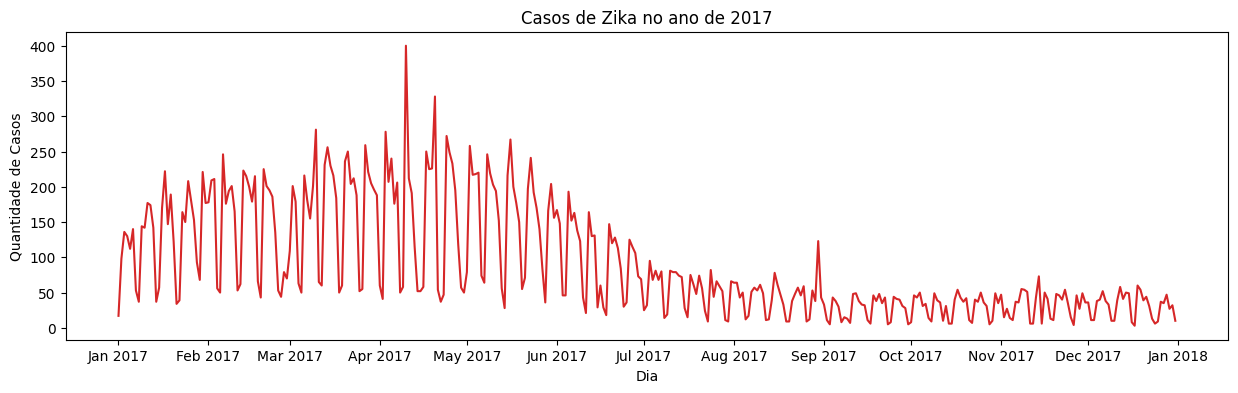

In [6]:
series_analysis.plot_series(
    df["Data"], # X
    df["Casos"], # Y
    "Dia", # XLabel
    "Quantidade de Casos", # YLabel
    "Casos de Zika no ano de 2017", # Title
)

## Transformação Box-Cox

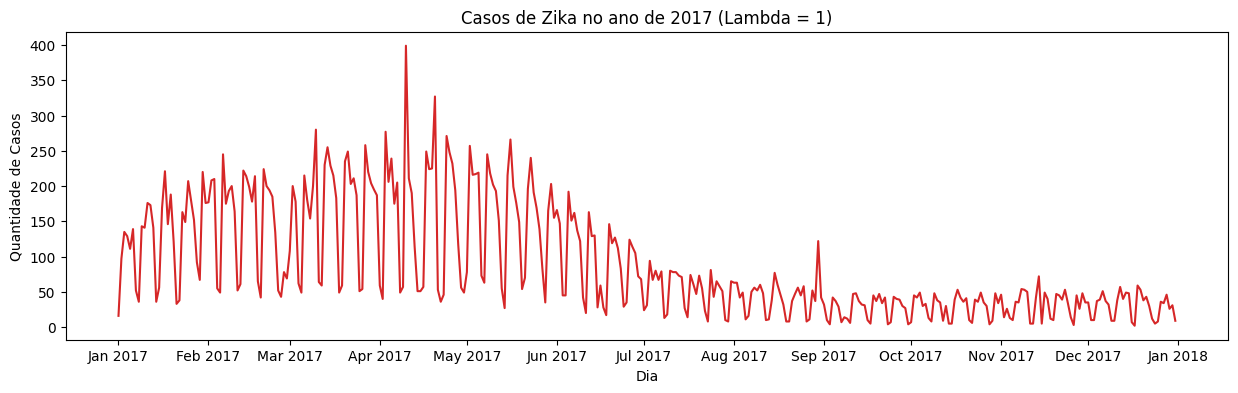

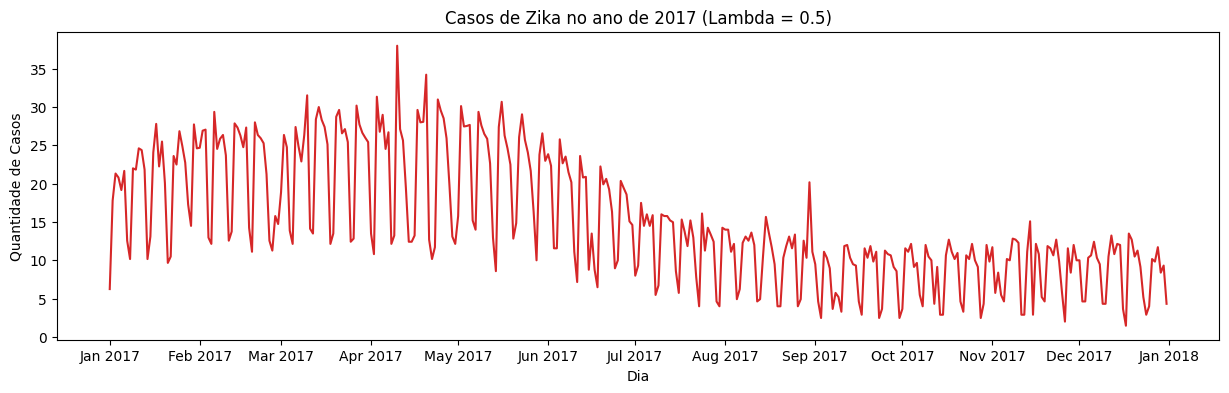

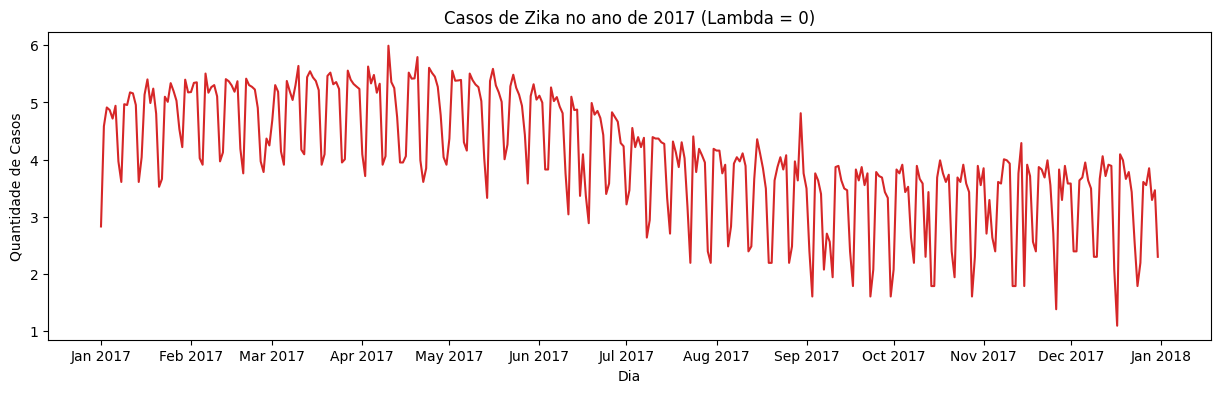

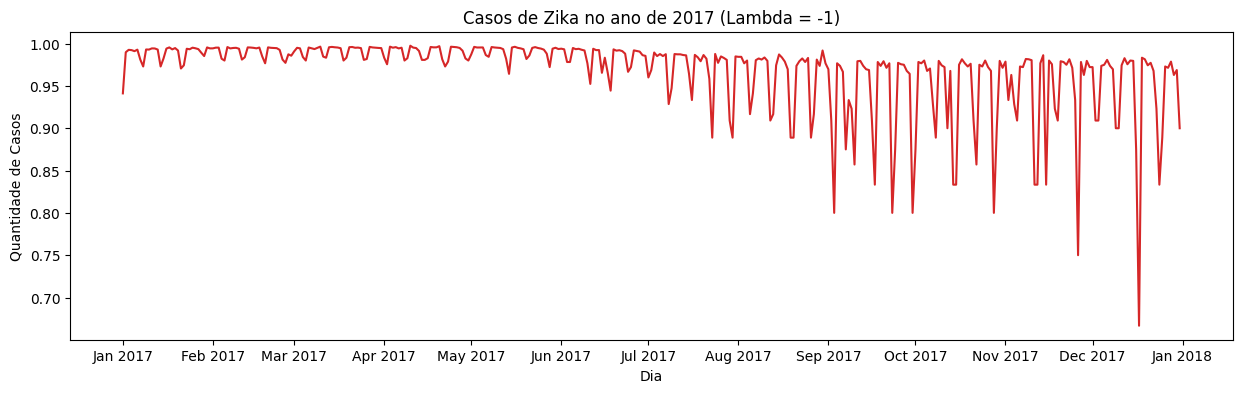

In [7]:
lambda_values = [1, 0.5, 0, -1]
for lmmbd in lambda_values:
    series_analysis.boxcox_transformation(
        df["Data"],
        df["Casos"],
        "Dia",
        "Quantidade de Casos",
        f"Casos de Zika no ano de 2017 (Lambda = {lmmbd})",
        lmmbd
    )

## Lidando com Tendências

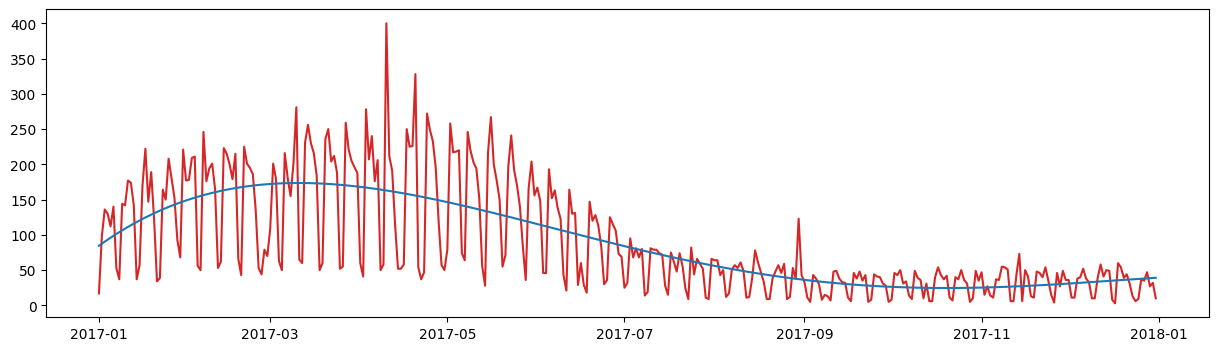

In [8]:
lista = np.array(list(range(1,366)))

X = np.column_stack(lista)
X = X.reshape([365,1])

Xm = X ** np.arange(0,5)

trend = series_analysis.series_trend(Xm, df['Casos'])

plt.figure(figsize=(15,4))
plt.plot(df['Data'],df['Casos'],'tab:red')
plt.plot(df['Data'],trend,'-')
plt.show()

<Axes: title={'center': 'Casos de Zika no ano de 2017 (Sem Tendência)'}, xlabel='Dia', ylabel='Quantidade de Casos'>

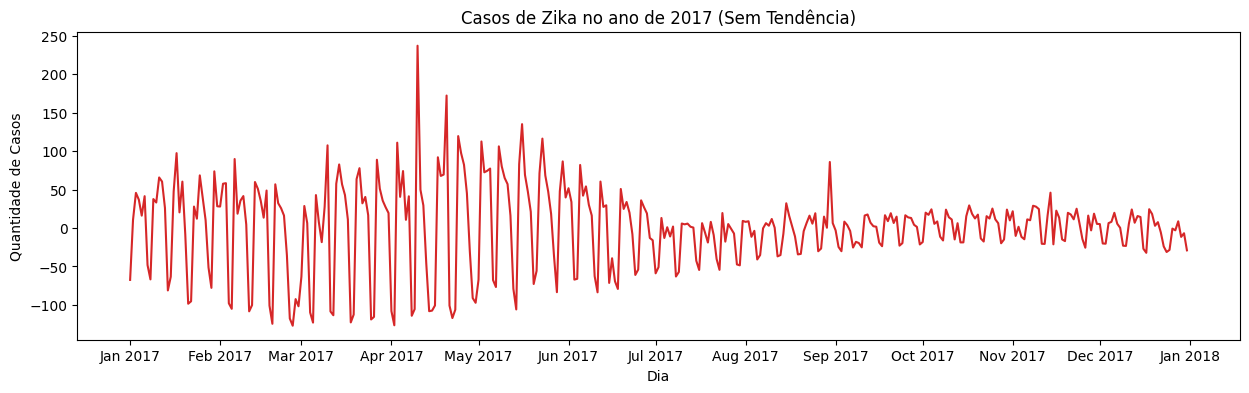

In [9]:
without_trend = df['Casos'].copy() - trend

series_analysis.plot_series(
    df["Data"], # X
    without_trend, # Y
    "Dia", # XLabel
    "Quantidade de Casos", # YLabel
    "Casos de Zika no ano de 2017 (Sem Tendência)", # Title
)

## Filtro Linear

<Figure size 1500x400 with 0 Axes>

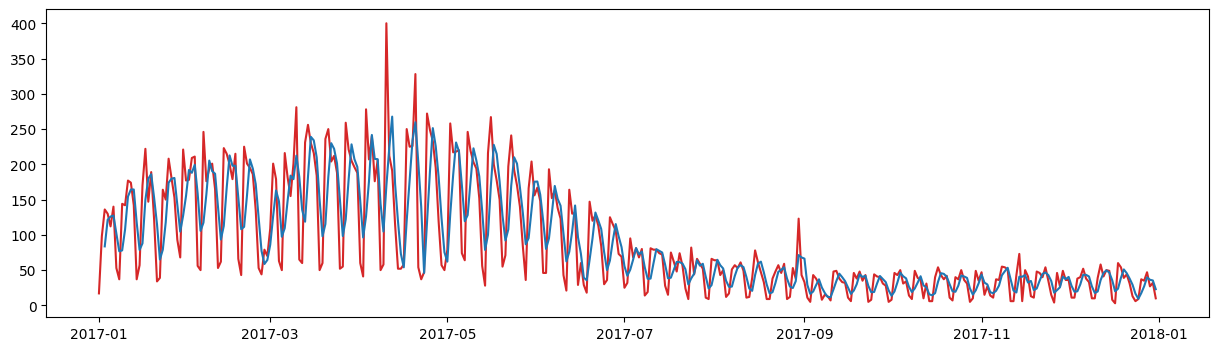

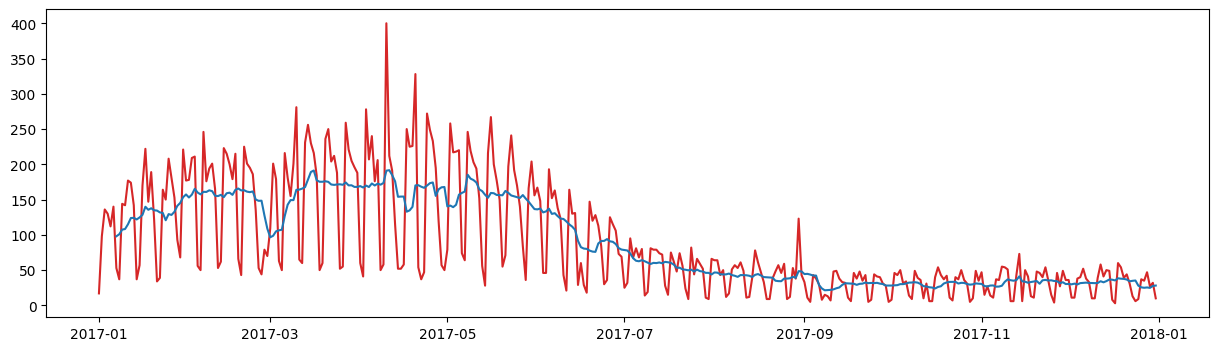

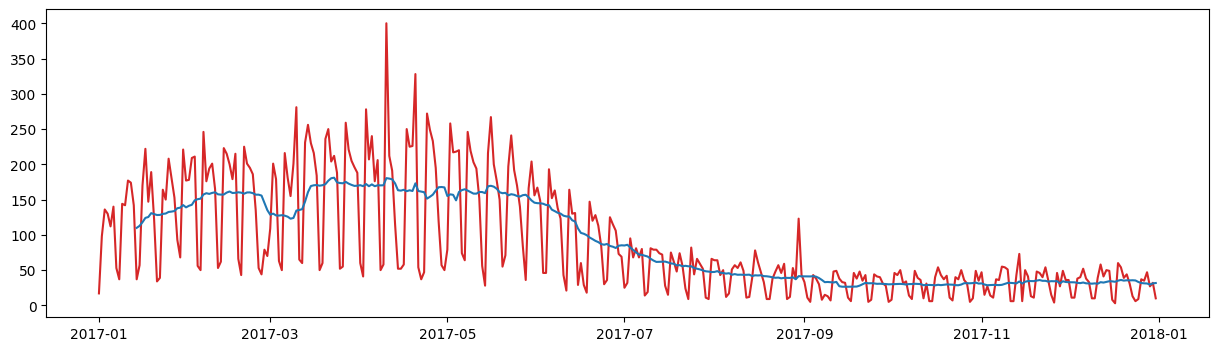

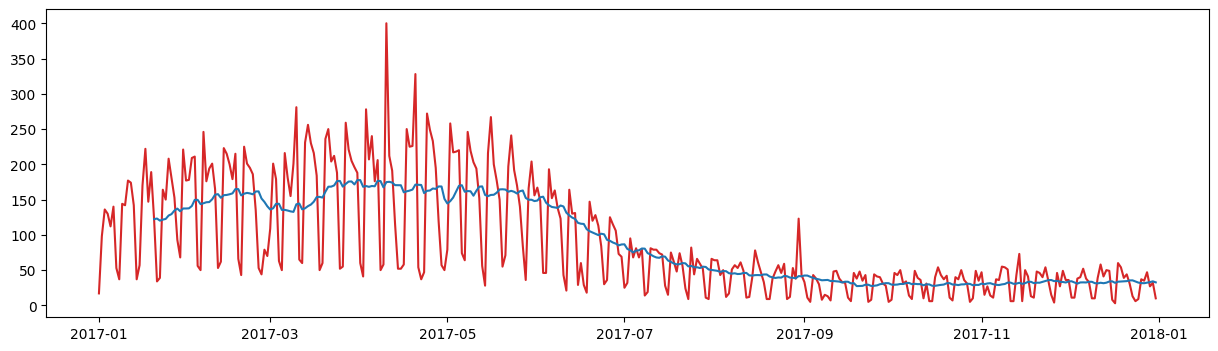

In [10]:
plt.figure(figsize=(15, 4))
k_list = [3, 7, 14, 20]

for x in k_list:
    plt.figure(figsize=(15, 4))
    filtrado = series_analysis.linear_filter(df["Casos"].copy(), x)
    plt.plot(list(df["Data"]), df["Casos"], "tab:red")
    plt.plot(list(df["Data"])[(x - 1) :], filtrado, "-")
    plt.show()

### Diferenciação de Primeira Ordem

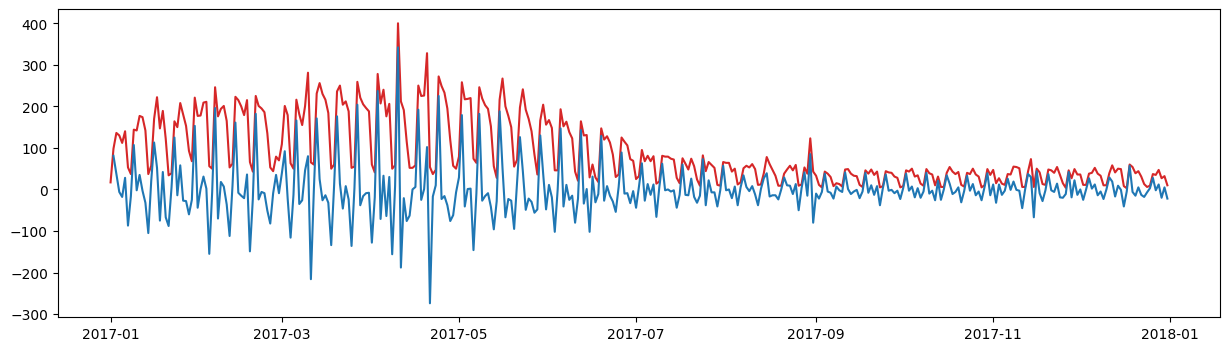

In [11]:
plt.figure(figsize=(15,4))
filtrado = series_analysis.linear_filter(df['Casos'].copy(), x)
plt.plot(list(df['Data']),df['Casos'],'tab:red')
plt.plot(list(df['Data'])[1:],series_analysis.first_order_diff(df['Casos']),'-')
plt.show()

## Diferenciação Sazonal

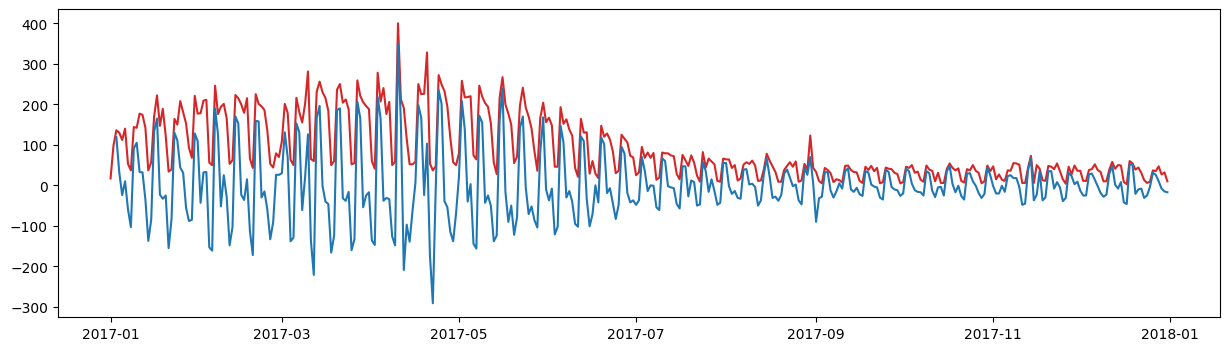

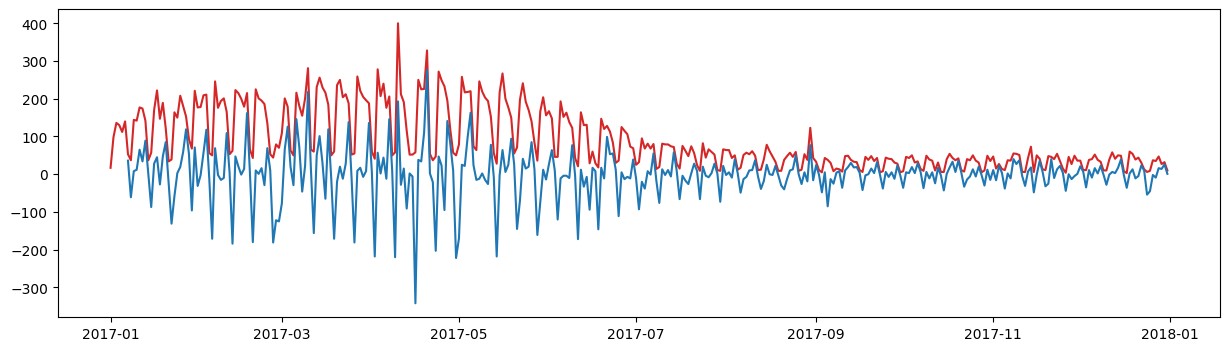

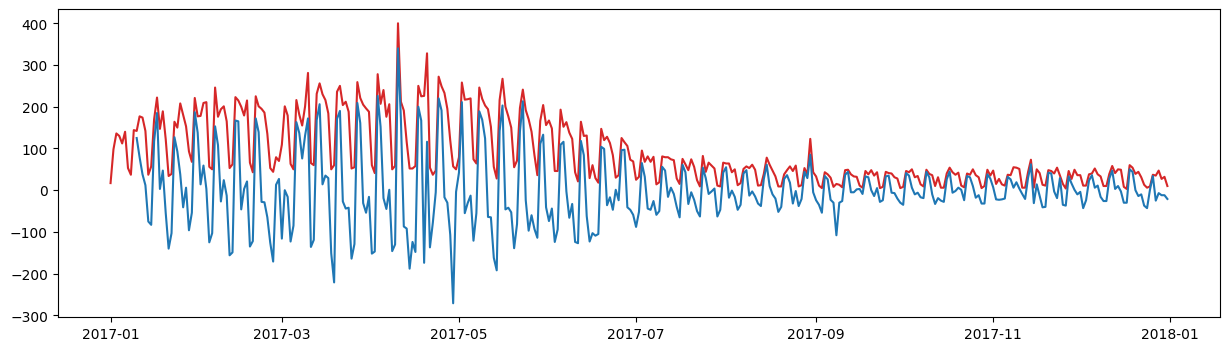

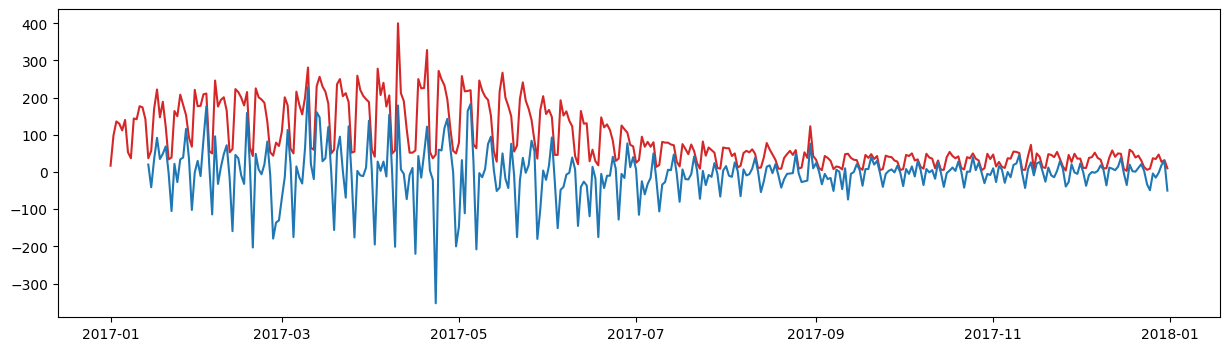

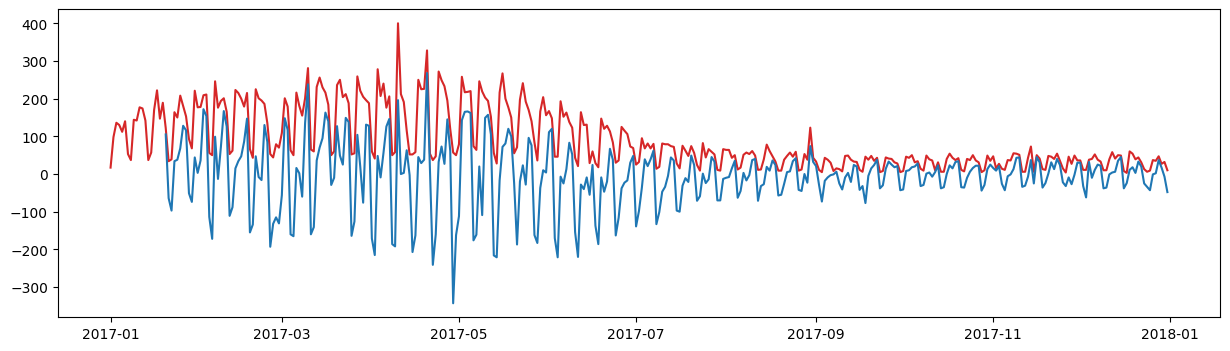

In [12]:
k_list = [3, 7, 10, 14, 20]

for x in k_list:
    plt.figure(figsize=(15, 4))
    diferenciado = series_analysis.sazonal_diff(np.array((df["Casos"].copy())), x)
    plt.plot(list(df["Data"]), df["Casos"], "tab:red")
    plt.plot(list(df["Data"])[x - 1 :], diferenciado, "-")
    plt.show()

## Correlograma

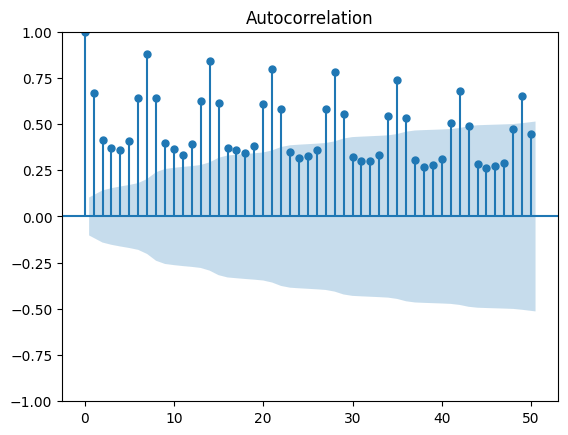

In [13]:
ax = series_analysis.autocorrelation(df['Casos'], 50)

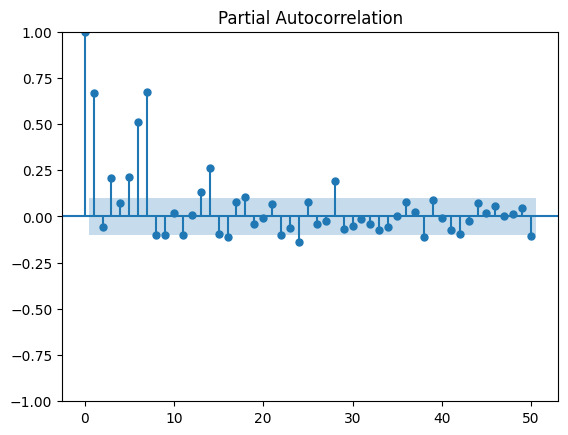

In [14]:
ax = series_analysis.partial_autocorrelation(df['Casos'], 50)